## 6  Writing Custom Functions
### 6.1 Introduction

A function is a set of actions that we group together and name. Throughout this course, you’ve already used a bunch of different functions in python that are built into the language or added through packages: mean, ggplot, merge, etc. In this chapter, we’ll be writing our own functions.

### 6.2 Defining a function

### 6.2.1 When to write a function?

If you’ve written the same code (with a few minor changes, like variable names) more than twice, you should probably write a function instead of copy pasting. The motivation behind this is the “don’t repeat yourself” (DRY) principle. There are a few benefits to this rule:

1. Your code stays neater (and shorter), so it is easier to read, understand, and maintain.

2. If you need to fix the code because of errors, you only have to do it in one place.

3. You can re-use code in other files by keeping functions you need regularly in a file (or if you’re really awesome, in your own package!)

4. If you name your functions well, your code becomes easier to understand thanks to grouping a set of actions under a descriptive function name.

Consider the following data analysis task done in python:





In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.DataFrame({'a':np.random.normal(1,1,10), 'b':np.random.normal(2,2,10), 'c':np.random.normal(3,3,10), 'd':np.random.normal(4,4,10)})

df['a'] = (df['a'] - min(df['a']))/(max(df['a']) - min(df['a']))

df['b'] = (df['b'] - min(df['a']))/(max(df['b']) - min(df['b']))

df['c'] = (df['c'] - min(df['c']))/(max(df['c']) - min(df['c']))

df['d'] = (df['d'] - min(df['d']))/(max(df['d']) - min(df['d']))


In theory, the code rescales a set of variables to have a range from 0 to 1. But, because of the copy-pasting, the code’s author made a mistake and forgot to change an a to b!

Writing a function will help us avoid these subtle copy-paste errors.

### 6.2.2 Building up the function

To write a function, we first analyze the code to determine how many inputs it has

In [8]:
df['a'] = (df['a'] - min(df['a']))/(max(df['a']) - min(df['a']))

This code has only one input: df['a'].



Check In

What is the object structure of this input?


* `df` is a Pandas DataFrame.
* `df['a']` selects a single column named 'a' from the DataFrame.
* A single column in a Pandas DataFrame is represented as a Pandas Series object, which is essentially a one-dimensional labeled array capable of holding data of any type.

Now we choose an **argument name** for our new input. It’s nice if the argument name reminds the user of what type or structure of object is expected.



In this case, it might help to replace `df$a `with `vec`.



In [9]:
vec = df['a']

(vec - min(vec))/(max(vec) - min(vec))

,a
0,0.492985
1,0.610924
2,0.000000
3,0.688249
4,0.274932
5,0.402888
6,0.686881
7,0.791483
8,1.000000
9,0.488076


Then, we make it a bit easier to read, removing duplicate computations if possible (for instance, computing `min` two times) or separating steps to avoid nested parentheses (for instance, computing `max` first).



In [10]:
vec = df['a']
min_vec = min(vec)
max_vec = max(vec)

(vec - min_vec)/(max_vec - min_vec)

,a
0,0.492985
1,0.610924
2,0.000000
3,0.688249
4,0.274932
5,0.402888
6,0.686881
7,0.791483
8,1.000000
9,0.488076


Finally, we turn this code into a function with the `def` command:



In [11]:
def rescale_vector(vec):

  min_vec = min(vec)
  max_vec = max(vec)

  rescaled_vec = (vec - min_vec)/(max_vec - min_vec)

  return rescaled_vec

* The name of the function, rescale_vector, describes what the function does - it rescales a vector (pandas Series or numpy array).

* The function takes one **argument**, named vec; any references to this value within the function will use vec as the name.

* The code that actually does what your function is supposed to do goes in the body of the function, after the :. It is important for the **body** of the function to be *indented*.

* The function **returns** the computed object you want to hand back to the user: in this case, *rescaled_vec*.

##### Note

Some people prefer to create a final object and then return: that object, as we have done above with rescaled_vec.

Others prefer fewer objects and longer lines of code, i.e.,



```
def rescale_vector(vec):
  
  min_vec = min(vec)
  max_vec = max(vec)
  
  return (vec - min_vec)/(max_vec - min_vec)
```
These two approaches will work identically; it’s a matter of personal preference.


The process for creating a function is important: first, you figure out how to do the thing you want to do. Then, you simplify the code as much as possible. Only at the end of that process do you create an actual function.



Now, we are able to use our function to avoid the repetition:



In [12]:
df['a'] = rescale_vector(df['a'])
df['b'] = rescale_vector(df['b'])
df['c'] = rescale_vector(df['c'])
df['d'] = rescale_vector(df['d'])

You probably notice there is still a little bit of repetition here, with df['a'] appearing on both the left and right side of the =. But this is good repetition! When we assign or reassign an object or column, we want that to be an obvious and deliberate choice.

It’s also possible that you might have preferred to keep your original column untouched, and to make new columns for the rescaled data:

In [13]:
df['a_scaled'] = rescale_vector(df['a'])
df['b_scaled'] = rescale_vector(df['b'])
df['c_scaled'] = rescale_vector(df['c'])
df['d_scaled'] = rescale_vector(df['d'])

### 6.2.3 Documenting your function

When you want to use a function in `python`, but you can’t quite remember exactly how it works, you might be in the habit of typing ?`fun_name` or `help(fun_name)` to be able to see the **documentation** for that function.

When you write your own function - whether for yourself or for others - it’s important to provide reminders of what the function is for and how it works.

We do this by adding text in a very specific structure into the body of our function:

In [14]:
def rescale_vector(vec):

  """
  Rescales a numeric vector to have a max of 1 and min of 0

  Parameter
  ---------
  vec : num
    A list, numpy array, or pandas Series of numeric data.

  Returns
  -------
  array
    A numpy array containing the rescaled values.
  """

  min_vec = min(vec)
  max_vec = max(vec)

  rescaled_vec = (vec - min_vec)/(max_vec - min_vec)

  return rescaled_vec

A few important aspects of the above to note:

* The use of three quotation marks, """ is necessary for this text to be recognized as official documentation.

* The exact structure of the Parameters and Returns sections, with underlines, is important for consistency with other documentation. There are a few other formatting styles that are generally accepted; we’ll stick with the one in this example in this course.

* When listing the arguments, a.k.a. parameters of our function, we specify the name of the argument, the data type that is expected, and a brief description.

* When listing the returns of our function, we specify what object structure is being returned, and a brief description.

* The blank line after the final """ is important!

In [15]:
help(rescale_vector)

Help on function rescale_vector in module __main__:

rescale_vector(vec)
    Rescales a numeric vector to have a max of 1 and min of 0
    
    Parameter
    ---------
    vec : num
      A list, numpy array, or pandas Series of numeric data.
    
    Returns
    -------
    array 
      A numpy array containing the rescaled values.



### 6.3 Scope
In the previous example, you might have expected



In [16]:
rescale_vector(df['a'])

,a
0,0.492985
1,0.610924
2,0.000000
3,0.688249
4,0.274932
5,0.402888
6,0.686881
7,0.791483
8,1.000000
9,0.488076


to change the column of the df object automatically - but it does not, unless you explicitly reassign the results! This is because everything that happens “inside” the function cannot change the status of objects outside the function.

This critical programming concept - determining when objects are changed and when they can be accessed - is called scope.

In general, an object is only available within the environment where it was created. Right now, as you work in your Jupyter notebook or Quarto document, you are interacting with your global environment. Run the globals() function to see all the objects you have created and libraries you have loaded so far.

Just as someone sitting next to you on a different computer can’t access an object in your own global environment, the body of a function is its own function environment.

Anything that is created or altered in the function environment does not impact the global environment - locally, you only “see” what the function returns.

#### 6.3.1 Name Masking

Scope is most clearly demonstrated when we use the same variable name inside and outside a function.

Note that this is 1) bad programming practice, and 2) fairly easily avoided if you can make your names even slightly more creative than a, b, and so on. But, for the purposes of demonstration, I hope you’ll forgive my lack of creativity in this area so that you can see how name masking works.

Consider the following code:

In [17]:
a = 10

def myfun(a):

  a = a + 10

  return a


myfun(a)

a + 5

15

#### 6.3.2 Nested environments and scope

One thing to notice is that each time the function is run, it creates a new local environment. That is, previous running of a function can’t impact future runs of that function.

For example, this code gives the same answer over and over; it does not continue to add 10 to a copy of a, because it never alters the object a in the global environment or the parameters of the other functions’ local environments.



In [18]:
def myfun(a):

  a = a + 10

  return a

myfun(a)
myfun(a)
myfun(a)

20

NameError: name 'a' is not defined
However, all of the local environments are considered to be inside of your global environment. That is, while they cannot change objects in the global environment, they can “see” those objects.

Notice in the below code that we don’t pass any arguments to myfun(). But it is still able to compute b + 1 and return an answer!

In [19]:
b = 10

def myfun():
  return b + 1

myfun()

11

A function will always look in its local environment first; then check the global for backups:



In [20]:
b = 10

def myfun():
  b = 20
  return b + 1

myfun()

21

Alas, although this is bad practice, we quite often “cheat” in Data Science and use global references to our dataset in function shortcuts, e.g.



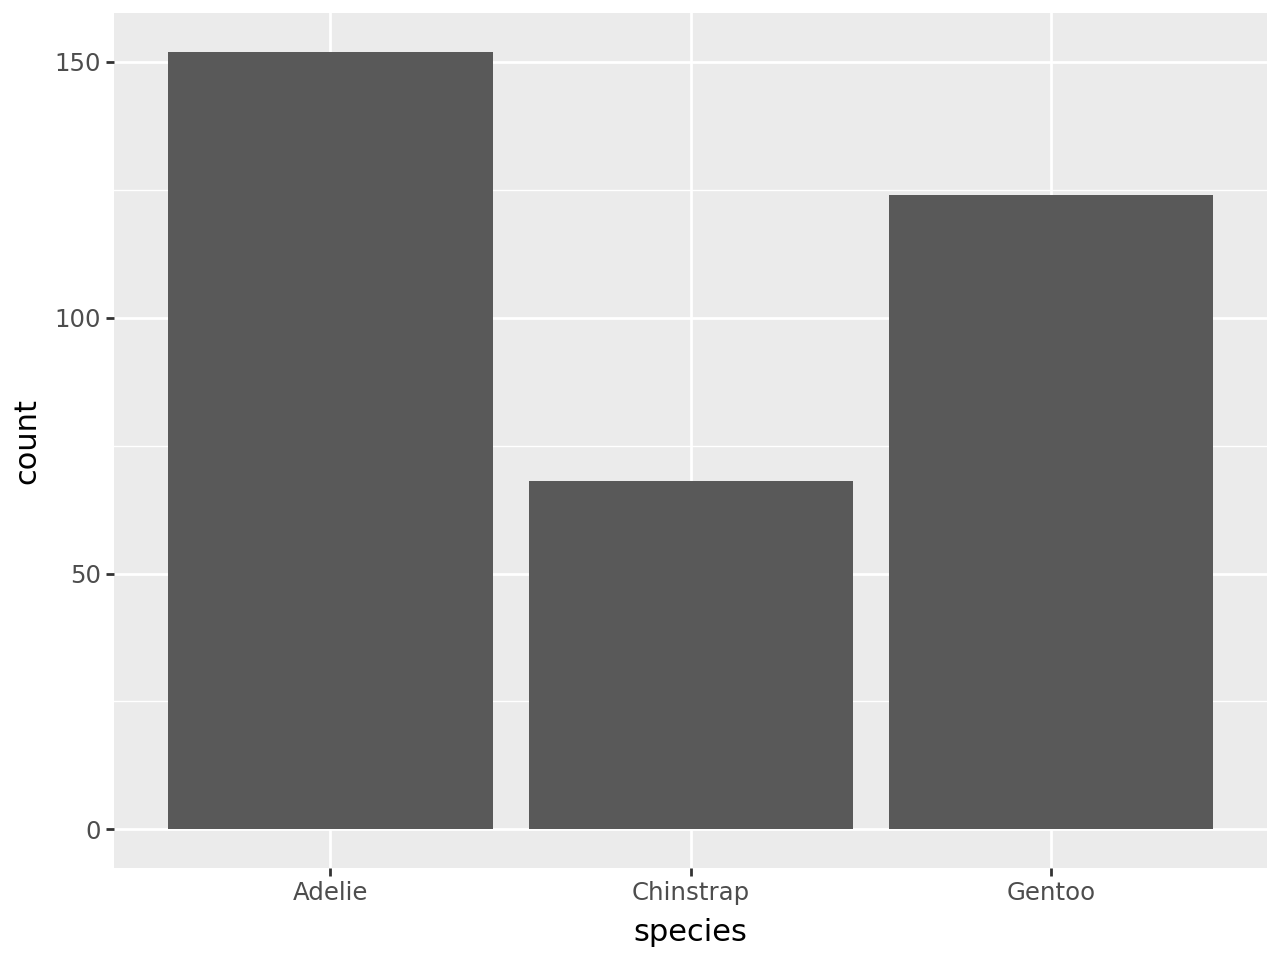

In [28]:
import pandas as pd
!pip install palmerpenguins

from palmerpenguins import load_penguins
from plotnine import *
penguins = load_penguins()

def plot_my_data(cat_var):

  plot = (ggplot(penguins, aes(x = cat_var)) + geom_bar())

  return plot


plot_my_data('species')

This “trick” is sometimes called Dynamic Lookup. You should mostly avoid it; but when you use it carefully and deliberately in the context of a specific data analysis, it can be a convenient approach.



Check In


Write a custom function that does the following:

1. Limit the penguins dataset to a user-chosen species and/or island.
2. Makes a scatterplot of the penguin bill length and depth.

Try writing a version of this function using dynamic lookup, and a version where everything the function needs is passed in directly.

In [32]:


def plot_penguins_dynamic(species=None, island=None):
  """
  Plots a scatterplot of penguin bill length and depth, optionally filtering by species and/or island.

  Parameters
  ----------
  species : str, optional
    The species of penguin to include in the plot.
  island : str, optional
    The island to include in the plot.

  Returns
  -------
  plotnine.ggplot
    A scatterplot of bill length vs. bill depth for the specified penguins.
  """
  global penguins  # Using dynamic lookup, accessing the penguins DataFrame from the global environment

  if species:
    penguins_subset = penguins[penguins['species'] == species]
  else:
    penguins_subset = penguins

  if island:
    penguins_subset = penguins_subset[penguins_subset['island'] == island]


  plot = (ggplot(penguins_subset, aes(x='bill_length_mm', y='bill_depth_mm')) +
          geom_point() +
          labs(x='Bill Length (mm)', y='Bill Depth (mm)', title='Penguin Bill Dimensions'))
  return plot





In [33]:
def plot_penguins_direct(penguins_df, species=None, island=None):
  """
  Plots a scatterplot of penguin bill length and depth, optionally filtering by species and/or island.

  Parameters
  ----------
  penguins_df : pandas.DataFrame
    The penguins DataFrame.
  species : str, optional
    The species of penguin to include in the plot.
  island : str, optional
    The island to include in the plot.

  Returns
  -------
  plotnine.ggplot
    A scatterplot of bill length vs. bill depth for the specified penguins.
  """

  if species:
    penguins_subset = penguins_df[penguins_df['species'] == species]
  else:
    penguins_subset = penguins_df

  if island:
    penguins_subset = penguins_subset[penguins_subset['island'] == island]


  plot = (ggplot(penguins_subset, aes(x='bill_length_mm', y='bill_depth_mm')) +
          geom_point() +
          labs(x='Bill Length (mm)', y='Bill Depth (mm)', title='Penguin Bill Dimensions'))
  return plot

But what if someone tried to enter the name of a variable that is not categorical? Or a variable that doesn’t exist in the penguins dataset? Or an input that is not a variable name (string)? Or no input at all?



In [34]:
plot_my_data('bill_length_mm')

plot_my_data('name')

plot_my_data(5)

plot_my_data(True)

plot_my_data()

TypeError: plot_my_data() missing 1 required positional argument: 'cat_var'

#### 6.4.2 Input Validation


When you write a function, you often assume that your parameters will be of a certain type. But as we saw above, you can’t guarantee that the person using your function knows that they need a certain type of input, and they might be confused by how your function handles that input. In these cases, it’s best to validate your function input.



#### 6.4.2.1 if-else and sys.exit

Generally your approach to validation will be to check some conditions, and exit the function if they are not met. The function exit() from the sys library is a good approach. You want to make sure you write an informative error statement in your exit, so that the user knows how to fix what went wrong.


The most common condition checking is to make sure the object type is correct - i.e., that the user inputs a string, and that the string refers to a categorical (a.k.a. “object”) variable in the penguins dataset.

Recall that you can “reverse” a boolean (True or False) value using the not statement. Sometimes, it is easier to check if a condition is not met than to list all the “good” conditions.

Putting these together, we can check if our user input to plot_my_data is what we expect:

In [35]:
from sys import exit

def plot_my_data(cat_var):

  if not isinstance(cat_var, str):
    exit("Please provide a variable name in the form of a string.")

  if not (cat_var in penguins.columns):
    exit("The variable provided is not found in the penguins dataset.")

  if not penguins[cat_var].dtypes == 'object':
    exit("Please provide the name of a categorical (object type) variable.")

  plot = (ggplot(penguins, aes(x = cat_var)) + geom_bar())

  return plot

Notice that we have used the isinstance base python function to check that the user inputted a string; but we have used the dtype method to check the data type of the column of data in a pandas dataframe.

When checking types and structures, be careful about “special” object types from packages, like pandas data frames or numpy arrays - they each unfortunately have their own type checking functions and their own names for types.

Now, let’s retry our unit tests:



In [36]:
plot_my_data('bill_length_mm')

plot_my_data('name')

plot_my_data(5)

plot_my_data(True)

plot_my_data()

SystemExit: Please provide the name of a categorical (object type) variable.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.


Input validation is one aspect of defensive programming - programming in such a way that you try to ensure that your programs don’t error out due to unexpected bugs by anticipating ways your programs might be misunderstood or misused. If you’re interested, Wikipedia has more about defensive programming.

#### 6.5 Debugging

Now that you’re writing functions, it’s time to talk a bit about debugging techniques. This is a lifelong topic - as you become a more advanced programmer, you will need to develop more advanced debugging skills as well (because you’ll find newer and more exciting ways to break your code!).



Let’s start with the basics: print debugging.



#### 6.5.1 Print Debugging

This technique is basically exactly what it sounds like. You insert a ton of print statements to give you an idea of what is happening at each step of the function.

Let’s try it out on the rescale_vector function.

In [37]:
def rescale_vector(vec):

  min_vec = min(vec)
  max_vec = max(vec)

  rescaled = (vec - min_vec)/(max_vec - min_vec)

  return rescaled

Suppose we try the following:



In [38]:
my_vec = [-1,0,1,2,3]

my_vec = np.sqrt(my_vec)

rescale_vector(my_vec)

<ipython-input-38-948044cab140>:3: RuntimeWarning: invalid value encountered in sqrt


array([nan, nan, nan, nan, nan])

You probably have spotted the issue here, but what if it wasn’t obvious, and we wanted to know why our function was returning an array of nan values.

Is the culprit the min? The max?



In [39]:
def rescale_vector(vec):

  min_vec = min(vec)
  print("min: " + str(min_vec))

  max_vec = max(vec)
  print("max: " + str(max_vec))

  rescaled = (vec - min_vec)/(max_vec - min_vec)

  return rescaled

In [40]:
rescale_vector(my_vec)

min: nan
max: nan


array([nan, nan, nan, nan, nan])

Notice how the print() statements cause information to get printed out as the function ran, but did not change the return value of the function!

Hmmm, both the min and the max were nan. This explains why our rescaling introduced all missing values!

So, the issue must be with the user input itself. Let’s rewrite our function to take a look at that.

In [41]:
def rescale_vector(vec):

  print(vec)

  min_vec = min(vec)
  max_vec = max(vec)

  rescaled = (vec - min_vec)/(max_vec - min_vec)

  return rescaled

In [42]:
rescale_vector(my_vec)

[       nan 0.         1.         1.41421356 1.73205081]


array([nan, nan, nan, nan, nan])

Ah-ha! The first value of the input vector is a nan.

Ideally, the user would not input a vector with missing values. But it’s our job to make sure the function is prepared to handle them.

### 6.5.2 Beyond print statements: breakpoints

While print() statements work fine as a quick-and-dirty debugging strategy, you will soon get tired of using them, since you have to change your function and reload it every time you want to check something.

A more elegant - and ultimately easier - approach is to “dive in” to the environment of the function itself, where you can interact with the parameters in the local environment the same way you might interact with your global environment.

To do this, we will set a breakpoint in our function. This will cause the function to run until that point, and then stop and let us play around in the environment.

In [43]:
def rescale_vector(vec):

  breakpoint()

  min_vec = min(vec)
  max_vec = max(vec)

  rescaled = (vec - min_vec)/(max_vec - min_vec)

  return rescaled

### 6.5.3 pdb (“python de-bugger”)

Although setting breakpoints can be much cleaner and more convenient than several print() statements, using breakpoint() still required us to modify and reload the function.

The most advanced and clean approach to debugging is to use the pdb library to dive straight in to the local environment.

In [45]:
def rescale_vector(vec):

  min_vec = min(vec)
  max_vec = max(vec)

  rescaled = (vec - min_vec)/(max_vec - min_vec)

  return rescaled

In [46]:
import pdb
pdb.run("rescale_vector(my_vec)")


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 596, in run
    sys.settrace(self.trace_dispatch)



> <string>(1)<module>()

ipdb> 3
3
ipdb> stop
*** NameError: name 'stop' is not defined



PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/bdb.py", line 603, in run
    sys.settrace(None)



--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


TypeError: unsupported operand type(s) for -: 'list' and 'int'

#### 6.6 General Debugging Strategies

Debugging: Being the detective in a crime movie where you are also the murderer.

The overall process of addressing a bug is:

Realize that you have a bug

1. Google! Generally Googling the error + the programming language + any packages you think are causing the issue is a good strategy.

2. Make the error repeatable: This makes it easier to figure out what the error is, faster to re-try to see if you fixed it, and easier to ask for help. Unit tests are perfect for this.

3. Figure out where it is. Print statements and debuggers help you dig into the function to find the problem area.

4. Fix it and test it. The goal with tests is to ensure that the same error doesn’t pop back up in a future version of your code. Generate an example that will test for the error, and add it to your documentation.



#### 6.6.1 Rubber Duck debugging

Have you ever called a friend or teacher over for help with an issue, only to find that by explaining it to them, you solved it yourself?

Talking through your code out loud is an extremely effective way to spot problems. In programming, we call this Rubber Duck Debugging, because coders will sometimes keep a small toy like a rubber duck by their computer, and talk to it while they are alone.



#### 6.6.2 Refactoring your code

In programming, as in life, big, general problems are very hard to solve effectively. Instead, the goal is to break a problem down into smaller pieces that may actually be solveable.

When we redesign our functions to consist of many smaller functions, this is called refactoring. Consider the following function:


In [ ]:
def rescale_all_variables(df):

  for col in df.columns:

    min_vec = min(df[col])
    max_vec = max(df[col])

    df[col] = (df[col] - min_vec)/(max_vec - min_vec)


  return df

A much cleaner and easier to read way to use this function would be to use the smaller function rescale_vector inside of rescale_all_variables

In [47]:
def rescale_all_variables(df):

  for col in df.columns:
    df[col] = rescale_vector(df[col])

  return df

This not only makes the code more readable to humans, it also helps us track down whether the error is happening in the outside function (rescale_all_variables) or the inside one (rescale_vector)



#### 6.6.3 Taking a break!

Do not be surprised if, in the process of debugging, you encounter new bugs. This is a problem that’s so well-known it has an xkcd comic.

At some point, getting up and going for a walk may help!




---



#### Practice Activity: Writing Functions

In [48]:
!pip install palmerpenguins

In [49]:
import numpy as np
import pandas as pd
from sys import exit
from palmerpenguins import load_penguins
from plotnine import *

1. Fill in the necessary code to write a function called `times_seven()`. The function should take a single argument (`x`) and multiply the input by 7.
  + This function should check that the argument is numeric.
  + This function should also excitedly announce (print) *“I love sevens!”* if the argument to the function is a 7.

In [50]:
def times_seven(x):
    if not isinstance(x, (int, float)):
        exit("Input must be a number.")

    if x == 7:
        print("I love sevens!")

    return x * 7

2. Write and run some *unit tests* for your `times_seven` function.  What happens if the input to the function is `[1, 3, 5, 7]`?

In [51]:
print(times_seven(1))
print(times_seven(3))
print(times_seven(5))
print(times_seven(7))

7
21
35
I love sevens!
49


 If the input function is [1, 3, 5, 7]

In [52]:
print(times_seven([1, 3, 5, 7]))

SystemExit: Input must be a number.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.


The input function [1,3,5,7] returns an error because the function only accepts numeric types like integers or floats. Since lists are not numeric, it results in the system exiting stating that the input must be a number.

3. Consider the following function:

In [53]:
def add_or_subtract(first_num, second_num = 2, type = "add"):

  if (type == "add"):
    res = first_num + second_num
  elif (type == "subtract"):
    res = first_num - second_num
  else:
    exit("Please choose `add` or `subtract` as the type.")

    return res

**Without running the code**, predict if the following will produce:

a. 1

b. -1

c. 30

d. An error defined by the function `add_or_subtract()`

e. An error defined in a different function, which is called inside the `add_or_subtract()` function

 Predictions for the cases:

   add_or_subtract(5, 6, type = "subtract")
   - Type: "subtract"
   - First argument = 5 "subtract" Second Argument = 6
   - 5-6 = -1
   - The function will perform subtraction: 5 - 6, which equals -1.
  - Prediction: b. -1



add_or_subtract("orange")
  - Type: defaults to "add"
  - Since "orange" is a string and not a number, attempting to add it to 2 will result in a TypeError
  
    - Prediction: e. An error defined in a different function, which is called inside the add_or_subtract() function

   
add_or_subtract(5, 6, type = "multiply")
   -  Type: "multiply"
   - Since "multiply" is not "add" or "subtract", the else condition will be triggered, and the function will call exit("Please choose addorsubtract as the type."), causing the program to exit with an error message.
   
    - Prediction: d. An error defined by the function add_or_subtract()

4. Consider the following code:

In [ ]:
first_num  = 5
second_num = 3

result = 8

result = add_or_subtract(first_num, second_num = 4)

result_2 = add_or_subtract(first_num)

In [54]:

In your Global Environment, what is the value of...

a. `first_num`

5

b. `second_num`

3

c. `result`

9

d. `result_2`

7

SyntaxError: invalid syntax (<ipython-input-54-718891d868a1>, line 1)



---



## 7 Iteration

### 7.1 Introduction

In this chapter, we will learn strategies for iteration, or performing a repeated task over many values.

Consider the following task: Suppose I want to get a computer to print out the lyrics to the song 99 Bottles of Beer on the Wall.

Now, we could certainly simply type up all the lyrics ourselves:



In [55]:
print(
  "99 Bottles of beer on the wall, 99 Bottles of beer. Take one down, pass it around, 98 Bottles of beer on the wall. 98 Bottles of beer on the wall, 98 Bottles of beer. Take one down, pass it around, 97 Bottles of beer on the wall." #... etc etc etc
)

99 Bottles of beer on the wall, 99 Bottles of beer. Take one down, pass it around, 98 Bottles of beer on the wall. 98 Bottles of beer on the wall, 98 Bottles of beer. Take one down, pass it around, 97 Bottles of beer on the wall.


That sounds like… not much fun to do.

But we notice that in the song, there is a ton of repetition! Every verse is almost identical, except for the number of bottles of beer.

This is a great time for some iteration.

### 7.2 For loops

The most basic approach to iteration is a simple for loop. At each step of the loop the value of our placeholder, i, changes to the next step in the provided list, range(100,97,-1).



In [56]:
for i in range(100,97,-1):
  print(str(i) + " bottles of beer on the wall")
  print(str(i) + " bottles of beer")
  print(" take one down, pass it around,")
  print(str(i-1) + " bottles of beer on the wall")

100 bottles of beer on the wall
100 bottles of beer
 take one down, pass it around,
99 bottles of beer on the wall
99 bottles of beer on the wall
99 bottles of beer
 take one down, pass it around,
98 bottles of beer on the wall
98 bottles of beer on the wall
98 bottles of beer
 take one down, pass it around,
97 bottles of beer on the wall


Check In

After last chapter, hopefully we immediately see that this is a great opportunity to write a function, to make our code clearer and avoid repetition.

Write a function called sing_verse() to replace the body of the for loop.

In [57]:


def sing_verse(num_bottles):
  """
  Prints a verse of the "99 Bottles of Beer" song.

  Args:
    num_bottles: The number of bottles in the current verse.
  """
  print(f"{num_bottles} bottles of beer on the wall, {num_bottles} bottles of beer.")
  print("Take one down, pass it around,")
  print(f"{num_bottles - 1} bottles of beer on the wall.")


for i in range(99, 0, -1):
  sing_verse(i)

99 bottles of beer on the wall, 99 bottles of beer.
Take one down, pass it around,
98 bottles of beer on the wall.
98 bottles of beer on the wall, 98 bottles of beer.
Take one down, pass it around,
97 bottles of beer on the wall.
97 bottles of beer on the wall, 97 bottles of beer.
Take one down, pass it around,
96 bottles of beer on the wall.
96 bottles of beer on the wall, 96 bottles of beer.
Take one down, pass it around,
95 bottles of beer on the wall.
95 bottles of beer on the wall, 95 bottles of beer.
Take one down, pass it around,
94 bottles of beer on the wall.
94 bottles of beer on the wall, 94 bottles of beer.
Take one down, pass it around,
93 bottles of beer on the wall.
93 bottles of beer on the wall, 93 bottles of beer.
Take one down, pass it around,
92 bottles of beer on the wall.
92 bottles of beer on the wall, 92 bottles of beer.
Take one down, pass it around,
91 bottles of beer on the wall.
91 bottles of beer on the wall, 91 bottles of beer.
Take one down, pass it aroun

In [58]:
def sing_verse(num):
  song = str(num) + " bottles of beer on the wall \n" + str(num) + " bottles of beer \n" + " take one down, pass it around, \n" + str(num-1) + " bottles of beer on the wall \n"

  return song

Notice that in this function, instead of print-ing out the lines of the song, we return the an object consisting as one long string.

Often, when running a for loop, you want to end the loop process with a single object. To do this, we start with an empty object, and then add to it at each loop.

In [59]:
song = ""

for i in range(100,97,-1):
  song = song + sing_verse(i)

print(song)

100 bottles of beer on the wall 
100 bottles of beer 
 take one down, pass it around, 
99 bottles of beer on the wall 
99 bottles of beer on the wall 
99 bottles of beer 
 take one down, pass it around, 
98 bottles of beer on the wall 
98 bottles of beer on the wall 
98 bottles of beer 
 take one down, pass it around, 
97 bottles of beer on the wall 




Check In

Modify the code above so that instead of creating one long string, we create a list, where each element is one of the verses of the song.

In [60]:
# prompt: Check In
# Modify the code above so that instead of creating one long string, we create a list, where each element is one of the verses of the song.

def sing_verse(num):
  song = [
      str(num) + " bottles of beer on the wall",
      str(num) + " bottles of beer",
      " take one down, pass it around,",
      str(num-1) + " bottles of beer on the wall"
  ]
  return song

song_list = []

for i in range(100, 97, -1):
  song_list.extend(sing_verse(i))

song_list

['100 bottles of beer on the wall',
 '100 bottles of beer',
 ' take one down, pass it around,',
 '99 bottles of beer on the wall',
 '99 bottles of beer on the wall',
 '99 bottles of beer',
 ' take one down, pass it around,',
 '98 bottles of beer on the wall',
 '98 bottles of beer on the wall',
 '98 bottles of beer',
 ' take one down, pass it around,',
 '97 bottles of beer on the wall']

### 7.2.1 Vectorized functions

The function that we wrote above can be described as not vectorized. What we mean by that it is designed to only take one value, num. If we instead try to input a list or vector of numbers, we get an error:

In [61]:
sing_verse([100,99,98])

TypeError: unsupported operand type(s) for -: 'list' and 'int'

This is why, in order to get results for a list of number, we needed to iterate.

However, plenty of functions are designed to work well for single numbers or lists and vectors. For example:

In [62]:
a_num = 5
a_vec = [1,3,5,7]

np.sqrt(a_num)
np.sqrt(a_vec)

array([1.        , 1.73205081, 2.23606798, 2.64575131])

When we want to perform a function over many values - whether it’s one we wrote or not - we first need to ask ourselves if the function is vectorized or not. Using a for loop over a vectorized function is unnecessarily complicated and computationally slow!

In [63]:
result = []
for i in a_vec:
  result = result + [np.sqrt(i)]

result

[1.0, 1.7320508075688772, 2.23606797749979, 2.6457513110645907]

#### 7.2.2 Vectorizing and booleans


A common reason why a custom function is written in an unvectorized way is that it makes use of if statements. For example, consider the task of taking the square root of only the positive numbers in a list.

Here is an approach that does not work:

In [64]:
a_vec = np.array([-2, 1, -3, -9, 7])

if a_vec > 0:
  a_vec = np.sqrt(a_vec)

a_vec

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

The statement if a_vec > 0 makes no sense for a vector! The if statement needs either a single True or a single False to determine if the subsequent code will be run - but a_vec > 0 returns a list of five booleans.

Instead, we would need to iterate over the values:

In [65]:
a_vec = np.array([-2, 1, -3, -9, 7])

for val in a_vec:
  if val > 0:
    val = np.sqrt(val)
  print(val)

-2
1.0
-3
-9
2.6457513110645907


However, there is a nicer approach to this variety of problem, which is to use boolean masking:



In [66]:
is_pos = a_vec > 0

a_vec[is_pos] = np.sqrt(a_vec[is_pos])

a_vec

array([-2,  1, -3, -9,  2])

#### 7.3 Iterable functions

Although for loops are a clear and basic procedure, it can become very tedious to use them frequently. This is especially true if you want to save the results of the iteration as a new object.

However, it will not be possible or convenient to write every function in a vectorized way.

Instead, we can use iterable functions, which perform the same iteration as a for loop in shorter and more elegant code.



### 7.3.1 map()

The map() function requires the same information as a for loop: what values we want to iterate over, and what we want to do with each value.



In [67]:
song = map(sing_verse, range(100, 97, -1))
song = list(song)
print("".join(song))

TypeError: sequence item 0: expected str instance, list found

Notice that the output of the map() function is a special object structure, of the type “map object”. We automatically convert this to a list with the list() function.

Then, we make use of the join() string method to turn the list into one long string. Finally, we print() our final string out so that it looks nice.

#### 7.3.1.1 Double mapping

Sometimes, we want to loop through multiple sets of values at once. The map() function has the ability to take as many iterables, or lists of values, as you want.

Suppose we want to change our sing_verse() function so that it has two arguments, the number of bottles and the type of drink.



In [68]:
def sing_verse_2(num, drink):
  song = str(num) + " bottles of " + drink + " on the wall \n"
  song = song + str(num) + " bottles of " + drink + "\n"
  song = song + " take one down, pass it around, \n"
  song = song + str(num-1) + " bottles of " + drink + " on the wall \n"

  return song

Now, we use map() to switch the number and the drink at each iteration:



In [69]:
nums = range(100, 97, -1)
drinks = ["beer", "milk", "lemonade"]
song = map(sing_verse_2, nums, drinks)
print("".join(list(song)))

100 bottles of beer on the wall 
100 bottles of beer
 take one down, pass it around, 
99 bottles of beer on the wall 
99 bottles of milk on the wall 
99 bottles of milk
 take one down, pass it around, 
98 bottles of milk on the wall 
98 bottles of lemonade on the wall 
98 bottles of lemonade
 take one down, pass it around, 
97 bottles of lemonade on the wall 



Write a sing_verse_3() function that also lets us change the container (e.g. bottle, can, …) at each step of the loop.

Use map() to sing a few verses.

What happens if you supply three different drinks, but only two different types of containers?

#### 7.4 Lambda functions


What would you do if you still wanted to count down the number of bottles, but you wanted them all to be lemonade?

In this case, we want one of the arguments of our function to be iterated over many values, and the other one to stay consistent.

One rather inelegant way we could accomplish this is with a new function:



In [70]:
def sing_verse_lemonade(num):
  return sing_verse_2(num, "lemonade")

song = map(sing_verse_lemonade, nums)
print("".join(list(song)))

100 bottles of lemonade on the wall 
100 bottles of lemonade
 take one down, pass it around, 
99 bottles of lemonade on the wall 
99 bottles of lemonade on the wall 
99 bottles of lemonade
 take one down, pass it around, 
98 bottles of lemonade on the wall 
98 bottles of lemonade on the wall 
98 bottles of lemonade
 take one down, pass it around, 
97 bottles of lemonade on the wall 



This is a lot of extra lines of code, though, for a task that should be straightforward - and we’ll probably never use sing_verse_lemonade() again, so it’s a bit of a waste to create it.

Instead, we will use what is called a lambda function, which is like making a new sing_verse_lemonade wrapper function for temporary use:

In [71]:
song = map(lambda i: sing_verse_2(i, "lemonade"), nums)
print("".join(list(song)))

100 bottles of lemonade on the wall 
100 bottles of lemonade
 take one down, pass it around, 
99 bottles of lemonade on the wall 
99 bottles of lemonade on the wall 
99 bottles of lemonade
 take one down, pass it around, 
98 bottles of lemonade on the wall 
98 bottles of lemonade on the wall 
98 bottles of lemonade
 take one down, pass it around, 
97 bottles of lemonade on the wall 



The code lambda i: sing_verse_2(i, "lemonade") made a new anonymous function - sometimes called a headless function - that takes in one argument, i, and sends that argument into sing_verse_2.

#### 7.5 Iterating on datasets

This task of repeating a calculation with many inputs has a natural application area: datasets!

It is extremely common that we want to perform some calculation involving many variables of the dataset, and we want to repeat that same calculation over the values in each row.

For this situation, we use an iterable function that is very similar to map(): the .apply() method from pandas.

At its core, the .apply() method is meant for repeating a calculation over columns:

In [72]:
dat = pd.DataFrame({"x": [99, 50, 2], "y": [1, 2, 3]})

dat.apply(np.sqrt)

,x,y
0,9.949874,1.000000
1,7.071068,1.414214
2,1.414214,1.732051


In this chapter, though, we are more interested in using it to repeat a function, using each row as input:

In [73]:
dat.apply(np.sum, axis=1)

,0
0,100
1,52
2,5


Suppose we have a pandas dataframe consisting of all the numbers, drinks, and containers that we are interested in singing about:

In [74]:
dat = pd.DataFrame({"num": [99, 50, 2], "drink": ["beer", "soda", "Capri Sun"], "container": ["bottles", "cans", "pouches"]})

dat

,num,drink,container
0,99,beer,bottles
1,50,soda,cans
2,2,Capri Sun,pouches


Our goal is to apply the sing_verse_3 function over all these combinations of values.

Unfortunately, this doesn’t happen automatically:



This is because .apply doesn’t “know” which columns below with which arguments of the sing_verse_3 function. We’ll need to use a lambda function to help it out:

In [75]:
dat.apply(lambda x: sing_verse_3(x['num'], x['drink'], x['container']), axis=1)

NameError: name 'sing_verse_3' is not defined



---



# Practice Activity: Iteration

0. Load the `penguins` dataset from the `palmerpenguins` library, as well as any other libraries you need.

In [77]:
!pip install palmerpenguins

import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *

penguins = load_penguins()


1. Write a function that takes in information about a penguin, and returns one of the following definitions:

*   "Big Mouth Billy": Male penguins with bill length times bill depth greater than 800.
*   "Dainty Daisy": Female penguins with flipper length less than 5% of body mass.
*   "Average Adelie:" Any Adelie penguins that do not fall into either category.
*   "Other": Any penguins that do not fall into any of the categories.

In [78]:

def categorize_penguin(row):
  """Categorizes a penguin based on its characteristics."""

  if row['sex'] == 'male' and row['bill_length_mm'] * row['bill_depth_mm'] > 800:
    return "Big Mouth Billy"
  elif row['sex'] == 'female' and row['flipper_length_mm'] < 0.05 * row['body_mass_g']:
    return "Dainty Daisy"
  elif row['species'] == 'Adelie' and not (row['sex'] == 'male' and row['bill_length_mm'] * row['bill_depth_mm'] > 800) and not (row['sex'] == 'female' and row['flipper_length_mm'] < 0.05 * row['body_mass_g']):
    return "Average Adelie"
  else:
    return "Other"

2. Use an iterable function to create a new variable called `category_name` that adds these labels.

In [82]:
penguins['category_name'] = penguins.apply(categorize_penguin, axis=1)

3. Run the following code to find the counts for each type.

In [83]:
penguins.value_counts("category_name")

,count
category_name,
Average Adelie,127
Other,84
Big Mouth Billy,71
Dainty Daisy,62
